In [21]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import arma_order_select_ic

In [22]:
raw_data = np.loadtxt('projectdata.txt')
data = raw_data[:50]

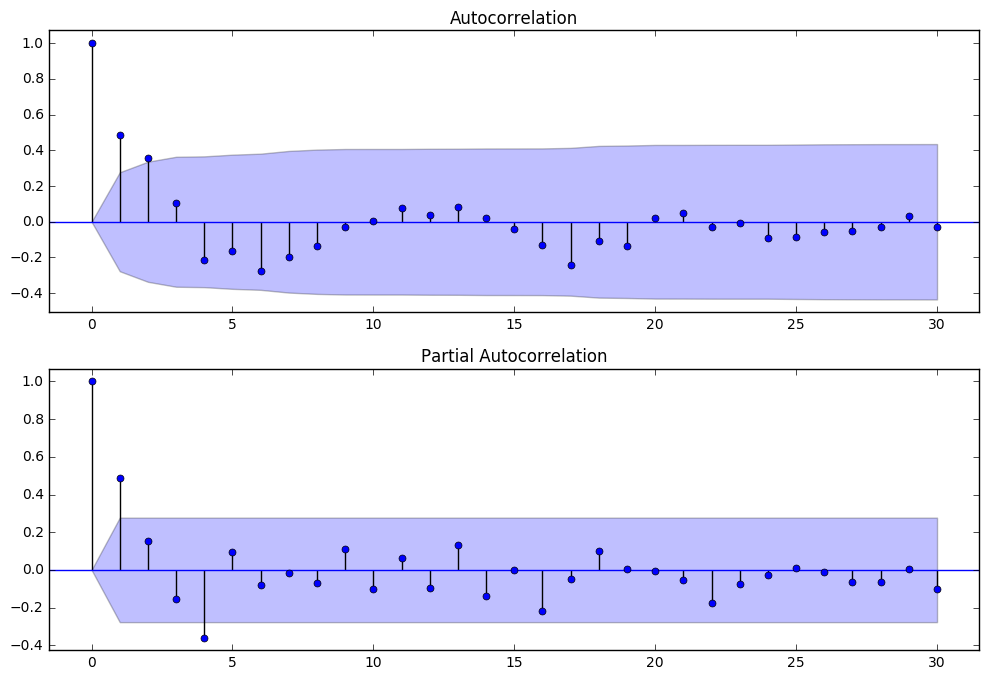

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=30, ax=ax2)
plt.show()

In [24]:
order = arma_order_select_ic(data)
print order

{'bic_min_order': (1, 0), 'bic':             0           1           2
0  187.031279  181.469132  177.969617
1  177.003700  180.392213  179.584149
2  179.897055  183.574670  182.829976
3  182.349610  182.874078  187.349613
4  178.871769  180.354369  182.373799}


In [25]:
arma_mod10 = sm.tsa.ARMA(data, (1,0))
arma_mod10_results = arma_mod10.fit()
print arma_mod10_results.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   50
Model:                     ARMA(1, 0)   Log Likelihood                 -82.634
Method:                       css-mle   S.D. of innovations              1.260
Date:                Sun, 16 Apr 2017   AIC                            171.268
Time:                        08:35:16   BIC                            177.004
Sample:                             0   HQIC                           173.452
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.5180      0.349     -1.483      0.144        -1.202     0.166
ar.L1.y        0.4985      0.123      4.043      0.000         0.257     0.740
                                    Roots           

In [26]:
arma_mod02 = sm.tsa.ARMA(data, (0,2))
arma_mod02_results = arma_mod02.fit()
print arma_mod02_results.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   50
Model:                     ARMA(0, 2)   Log Likelihood                 -81.161
Method:                       css-mle   S.D. of innovations              1.219
Date:                Sun, 16 Apr 2017   AIC                            170.322
Time:                        08:35:18   BIC                            177.970
Sample:                             0   HQIC                           173.234
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4936      0.301     -1.642      0.107        -1.083     0.096
ma.L1.y        0.2695      0.127      2.125      0.039         0.021     0.518
ma.L2.y        0.4983      0.130      3.846      0.0

In [27]:
arma_mod20 = sm.tsa.ARMA(data, (2,0))
arma_mod20_results = arma_mod20.fit()
print arma_mod20_results.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   50
Model:                     ARMA(2, 0)   Log Likelihood                 -82.124
Method:                       css-mle   S.D. of innovations              1.246
Date:                Sun, 16 Apr 2017   AIC                            172.249
Time:                        08:35:19   BIC                            179.897
Sample:                             0   HQIC                           175.161
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.5217      0.396     -1.317      0.194        -1.298     0.255
ar.L1.y        0.4215      0.143      2.940      0.005         0.141     0.702
ar.L2.y        0.1466      0.144      1.015      0.3

In [28]:
arma_mod10_resid = arma_mod10_results.resid
print stats.normaltest(arma_mod10_resid)

NormaltestResult(statistic=4.4007260008016287, pvalue=0.11076294407078043)


In [29]:
arma_mod02_resid = arma_mod02_results.resid
print stats.normaltest(arma_mod02_resid)

NormaltestResult(statistic=1.6639894602785013, pvalue=0.43518035260017296)


In [30]:
arma_mod20_resid = arma_mod20_results.resid
print stats.normaltest(arma_mod20_resid)

NormaltestResult(statistic=3.7600411550824742, pvalue=0.15258696585999604)


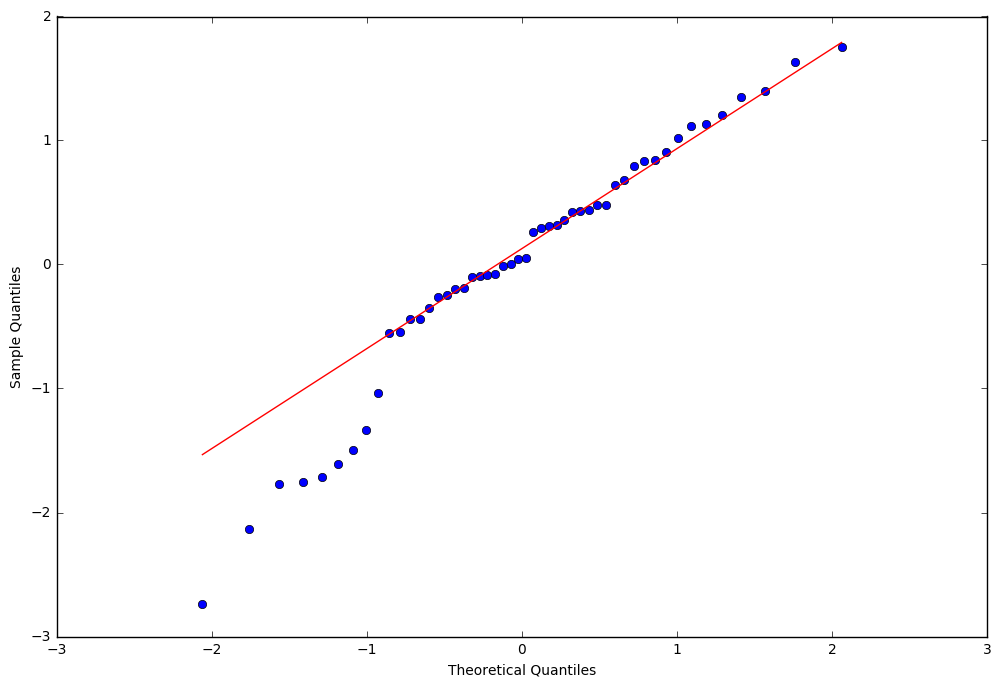

In [31]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma_mod10_resid, line='q', ax=ax, fit=True)
plt.show()

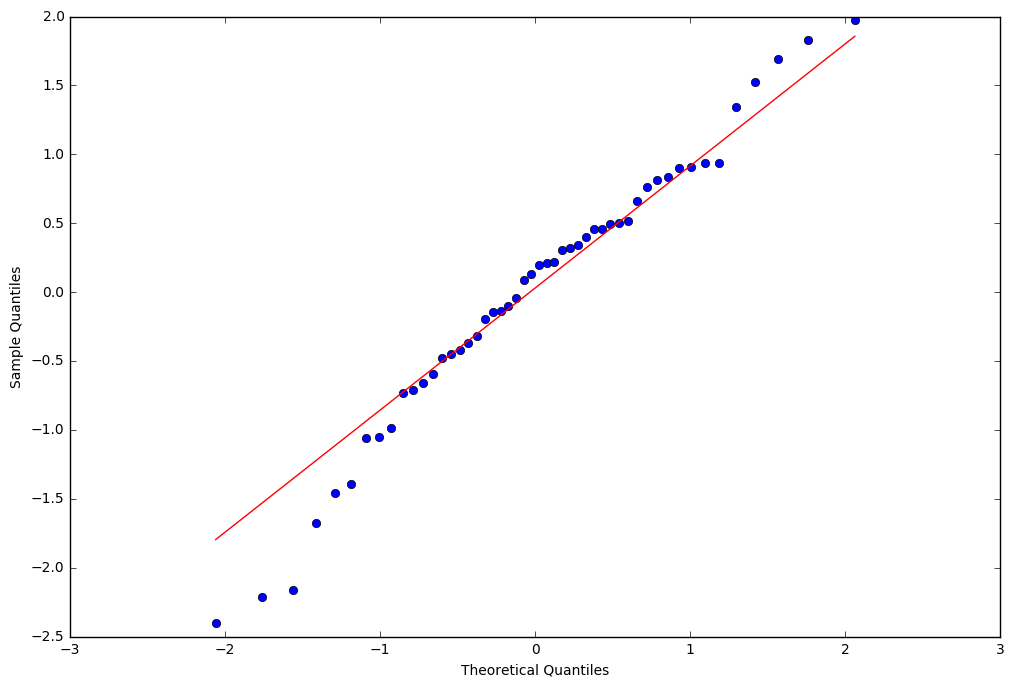

In [32]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma_mod02_resid, line='q', ax=ax, fit=True)
plt.show()

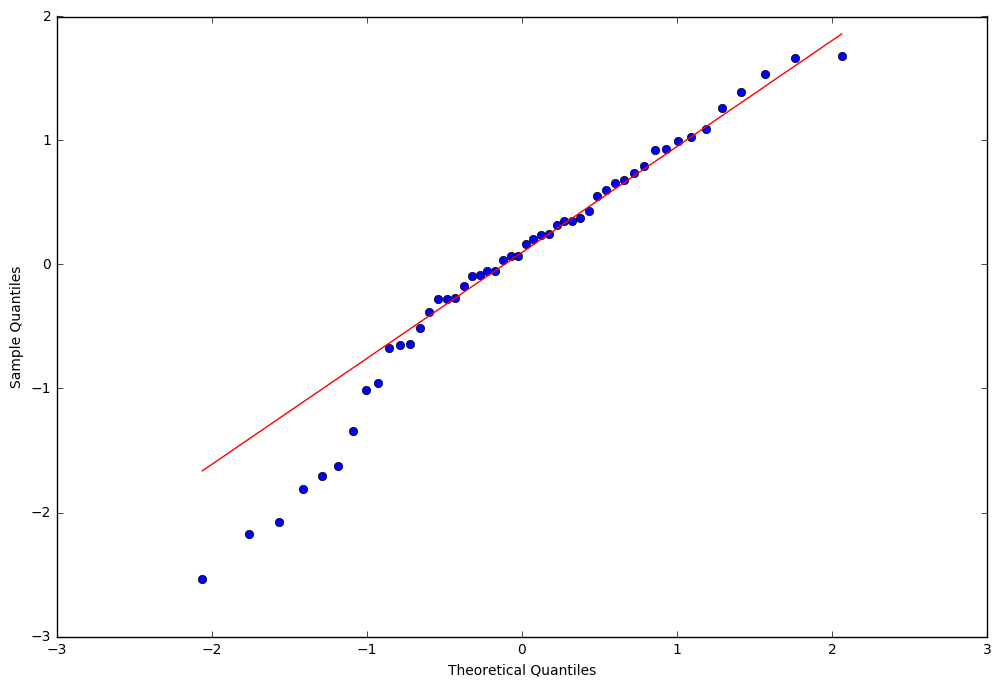

In [33]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma_mod20_resid, line='q', ax=ax, fit=True)
plt.show()

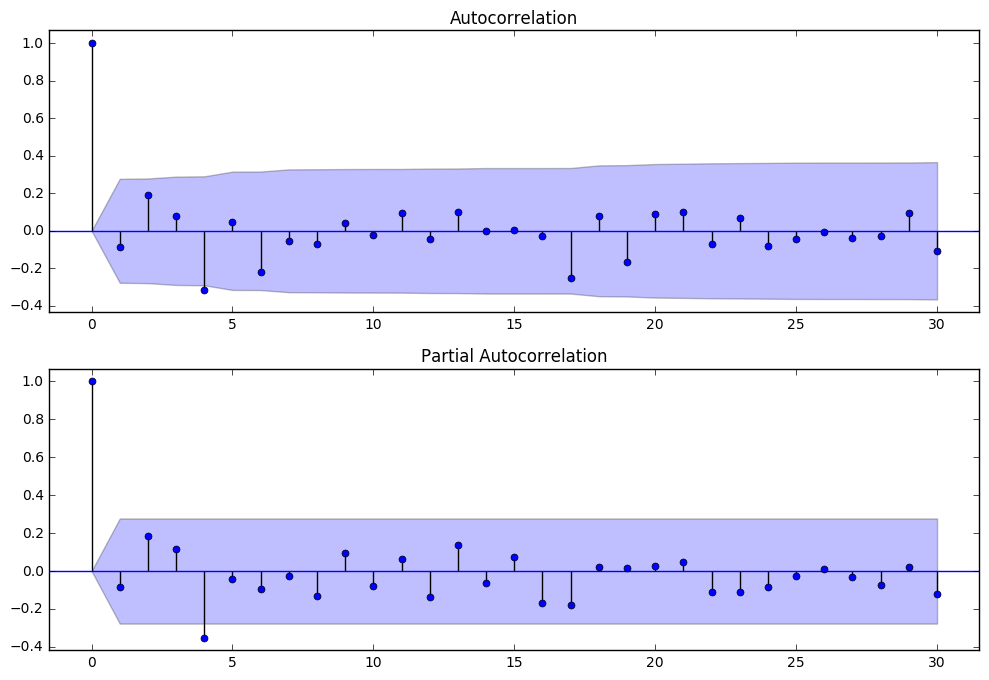

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_mod10_resid, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod10_resid, lags=30, ax=ax2)
plt.show()

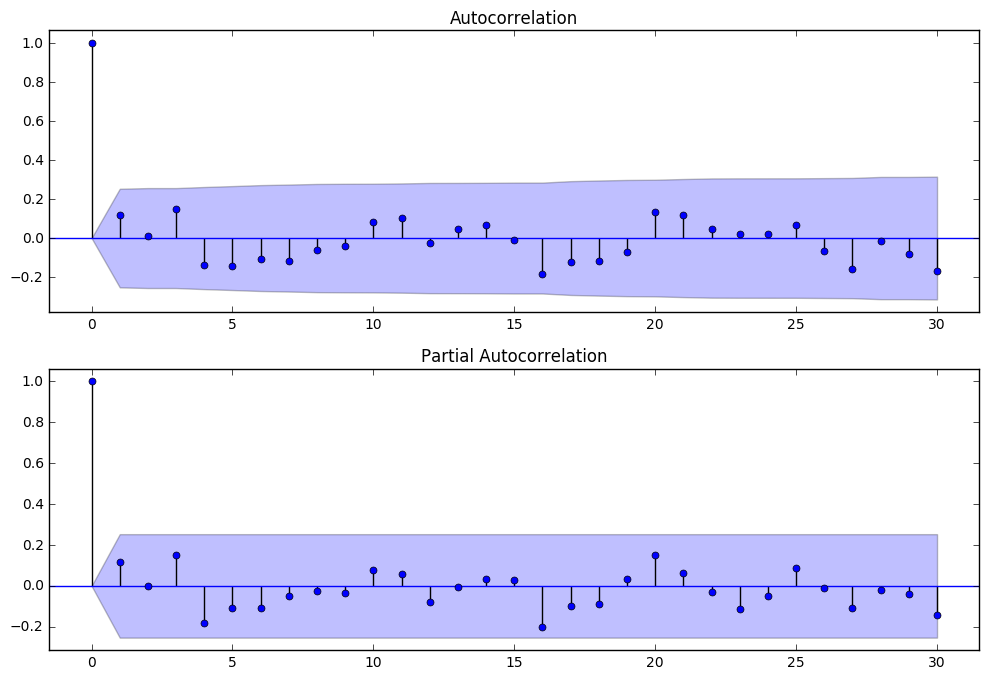

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_mod02_resid, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod02_resid, lags=30, ax=ax2)
plt.show()

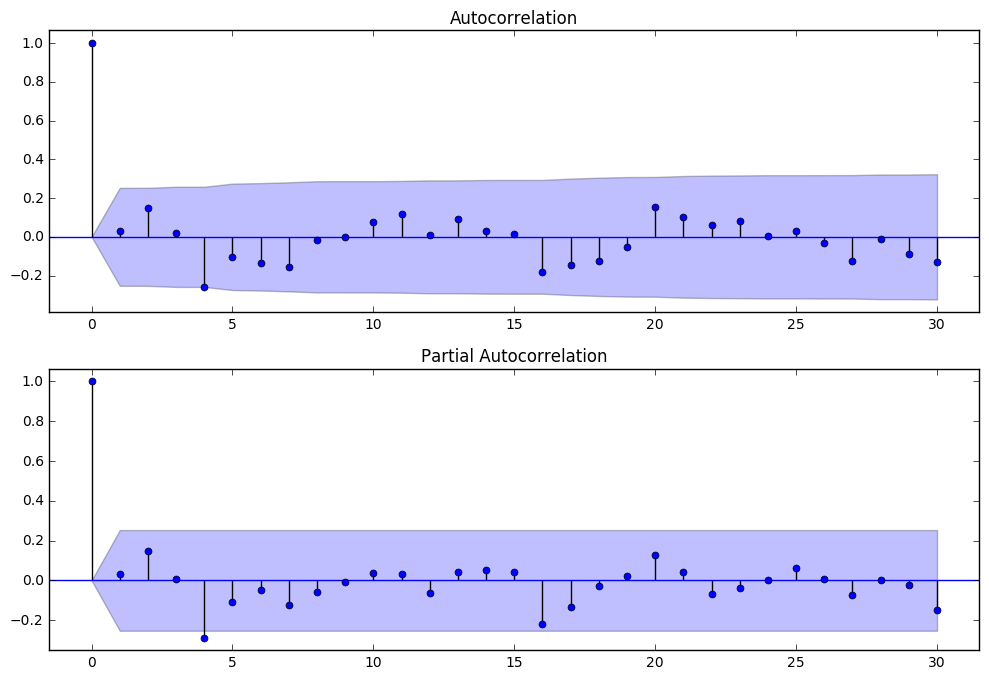

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arma_mod20_resid, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod20_resid, lags=30, ax=ax2)
plt.show()

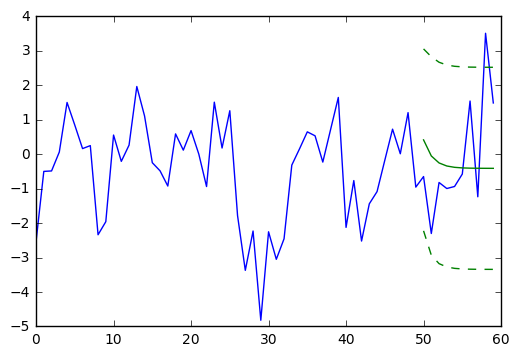

Cross-validation error = 5.54480449535


In [18]:
forecast = arma_mod10_results.forecast(10)
plt.plot(raw_data)
plt.plot(np.arange(50,60),forecast[0],'g')
plt.plot(np.arange(50,60),forecast[2][:,0],'g--')
plt.plot(np.arange(50,60),forecast[2][:,1],'g--')
plt.show()
print "Cross-validation error = "+str(np.linalg.norm(forecast[0] - raw_data[50:]))

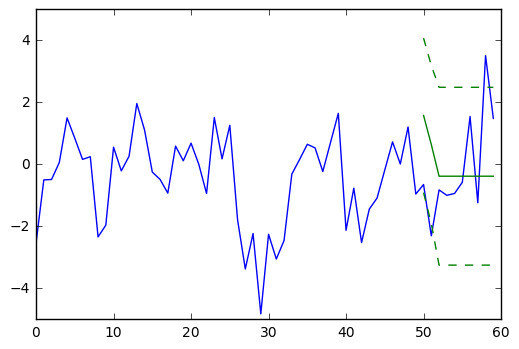

Cross-validation error = 6.1329950161


In [19]:
forecast = arma_mod02_results.forecast(10)
plt.plot(raw_data)
plt.plot(np.arange(50,60),forecast[0],'g')
plt.plot(np.arange(50,60),forecast[2][:,0],'g--')
plt.plot(np.arange(50,60),forecast[2][:,1],'g--')
plt.show()
print "Cross-validation error = "+str(np.linalg.norm(forecast[0] - raw_data[50:]))

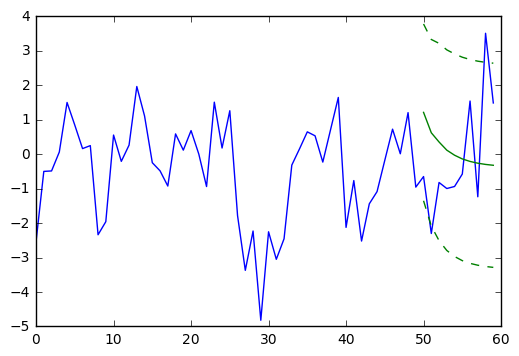

Cross-validation error = 6.1199835488


In [20]:
forecast = arma_mod20_results.forecast(10)
plt.plot(raw_data)
plt.plot(np.arange(50,60),forecast[0],'g')
plt.plot(np.arange(50,60),forecast[2][:,0],'g--')
plt.plot(np.arange(50,60),forecast[2][:,1],'g--')
plt.show()
print "Cross-validation error = "+str(np.linalg.norm(forecast[0] - raw_data[50:]))